MidTerm Project

ECG (Electrocardiogram):
The electrocardiogram (ECG) is an indicative device that is routinely used to evaluate the electrical and strong       elements of the heart. Training is required for the translation of ECG tracing as it is the basic test to perform.


ECG Signals:
The electrocardiogram signal is known to record the electrical activity of heart. The ECG signal is of low             amplitude at which the quality of signal is degraded due to small interference of external noise.
The ECG is also known as EKG. Each pulse is activated by an electrical signal that begins at the highest point of     your heart and goes to the base. The heart problems may include like pain in chest, breathing problem, feeling         like heart beat unevenly, feeling tired.

Q4)


 The length of the file is: 43081 as expected from 43081 samples x 1 lines

 The length of the time array is: 43081


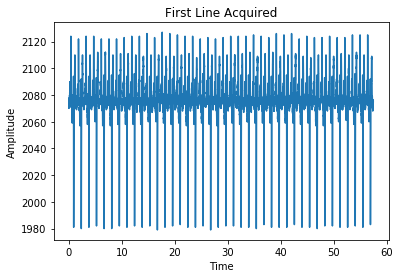

In [76]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


#we use a simple open command for the file (basic Python)
f = open('aami3a.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
EKGSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(EKGSignal)) + ' as expected from 43081 samples x 1 lines')
#we will now populate an array for the time which we now is 1/750Hz step for a total of 43081
x=np.arange(0,43081/75e1,1/75e1)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (43081 samples)
plt.plot(x,EKGSignal[:43081])
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Amplitude')

f.close() #close the file

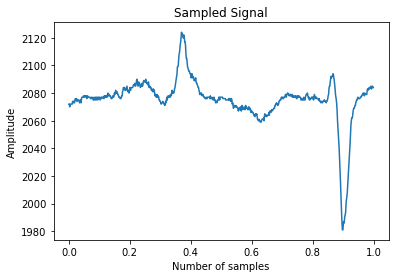

In [77]:
x=np.arange(0,750/75e1,1/75e1)  #start,stop,step
plt.plot(x,EKGSignal[:750])
plt.title('Sampled Signal')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
f.close()

Q5) If a person at rest has an average heart rate between 60 and 100 beats per minute, how many
samples should you plot to obtain 5 beats in the signal?

Solution:Say average heart rate is 80.  
    
    80/60=1.333333(beats/second).
    
    5 beats in signal,so 1.333333x5=6.666665.

Samples to plot to obtain 5 beats in signal is 6.666665/1.333333e3=50001

Therefore, 5001 samples are needed to obtain 5 beats in the signal

Q6)

Here take 5001 samples for zoom in for 5 beats

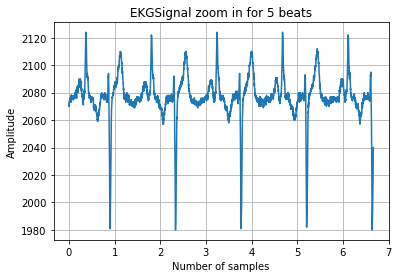

In [78]:
x=np.arange(0,5001/75e1,1/75e1)  #start,stop,step
plt.plot(x,EKGSignal[:5001])
plt.title('EKGSignal zoom in for 5 beats')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.grid()
f.close()

Q7)  The heart rate is lower for this individual

Q8)

In [79]:
x=np.amax(EKGSignal[:750])
print 'QRS peak is ' +str (x)

QRS peak is 2124


In [80]:
t=np.arange(21541)
x=0
for index in t:
    if EKGSignal[index]>=2124:
        x=x+1
print 'Heart rate of individual in beats per minute is ' +str(x*2) 

Heart rate of individual in beats per minute is 44


Q9)

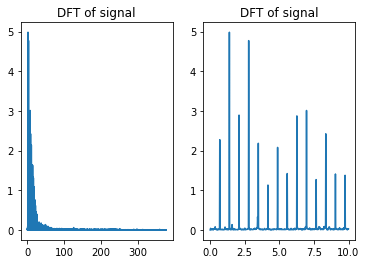

In [81]:
FirstLine=EKGSignal[:43081]
data=FirstLine-np.mean(FirstLine)
L=len(data)
f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(data)
Pyy=abs(Y)/L
plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT of signal')
inx=np.where(f>1e1)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of signal')

Q10)

In [82]:
t=np.arange(21541)
a=max(Pyy)
print(+a)
for index in t:
    if Pyy[index]>=21541:
        print('Frequency at which maximum is observed='+str(index/57.44))
        break

4.98176674504


In [83]:
t=np.arange(21541)
a=max(Pyy)
print(+a)
for index in t:
    if Pyy[index]>=4.98:
        print('Frequency at which maximum is observed='+str(index/57.44))
        break

4.98176674504
Frequency at which maximum is observed=1.39275766017


Q11)

Heart rate in beats/minute,

H=60/f, f is the frequency at the peak observed


Q12)

f=1.39

H=60/1.39=43(approx)

Q13)

It wont be problem to affect the amplitude of the signal from the reference 1

Q14) Q15)

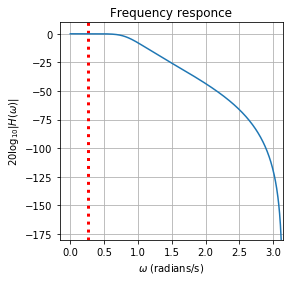

In [90]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((10,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

f=750
Ny=f/2
cutoff= 100
Wn=100/Ny
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,data)
x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $")
ax.set_xlabel(r'$\omega$ (radians/s)')
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()


Q16)

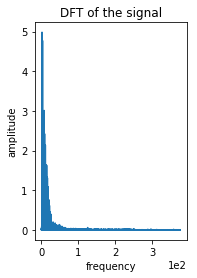

In [96]:
L=len(data)
f=np.arange(0,75e1/2,75e1/43081.)
Y=np.fft.fft(data)
Pyy=abs(Y)/L
plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT of the signal')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

Q17)

Since signal is same as before. So, there is no affect on amplitude.

References:

1.	Rizwan Qureshi, Muhammad Uzair and Khurram Khurshid, “Multistage Adaptive Filter for ECG Signal Processing,” 2017

2.  Huhta, James C., and John G. Webster. "60-Hz interference in electrocardiography." IEEE Transactions on Biomedical     Engineering 2 (1973): 91-101.

3.  Thakor, Nitish V., and Y-S. Zhu. "Applications of adaptive filtering to ECG analysis: noise cancellation and     arrhythmia detection." IEEE transactions on biomedical engineering 38.8 (1991): 785-794.

4. Jan Nedoma., Marcel Fajkus., Radek Martinek., Stanislav Kepak., Jakub Cubik., Stanislav Zabka., and Vladimir     Vasinek. "Comparison of BCG, PCG and ECG Signals in Application of Heart Rate Monitoring of the Human Body,"